### Hito2 para Rendimiento Escolar
*"Se generará un análisis descriptivo considerando el tipo de variables (desde el punto de vista estadístico así como computacional). Esta sección debe considerar medidas univariadas/ frecuencias, datos perdidos y gráficos distributivos sobre las variables a analizar. A partir de ésta se debe clarificar la estrategia de preprocesamiento (datos perdidos, recodificaciones)."*

### Inspección Visual

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import statsmodels.formula as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, classification_report 

from calidad_datos import calidad_datos as cal
from graficos import *

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn') # Gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (8,6) # Tamaño gráficos (5, 3)
plt.rcParams["figure.dpi"] = 75 # resolución gráficos 100

font = {'family': 'serif',
        'color':  'red',
        'weight': 'normal',
        'size': 12,
        }

In [2]:
#Se realiza la importación de los datos y ajuste del separador
df = pd.read_csv('students.csv', encoding='latin-1', sep='|',index_col=0)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,nulidade,U,GT3,A,4,4,at_home,teacher,...,4,3,"""4""",1,1,"""3""",6,5,6,6
1,GP,F,"""17""",U,GT3,T,1,1,at_home,other,...,5,3,"""3""",1,1,"""3""",4,5,5,6
2,GP,F,"""15""",U,LE3,T,1,1,at_home,other,...,4,3,"""2""",2,3,"""3""",10,zero,8,10
3,GP,F,"""15""",U,GT3,T,4,2,health,services,...,3,2,"""2""",1,1,"""5""",2,15,14,15
4,GP,F,sem validade,U,GT3,T,3,3,other,other,...,4,3,"""2""",1,2,"""5""",4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,"""20""",U,LE3,A,2,2,services,services,...,5,5,"""4""",4,5,"""4""",11,9,9,9
391,MS,M,"""17""",U,LE3,T,3,1,services,services,...,2,4,"""5""",3,4,"""2""",3,14,16,16
392,MS,M,"""21""",R,GT3,T,1,1,other,other,...,5,5,"""3""",3,3,"""3""",3,10,8,7
393,MS,M,"""18""",R,LE3,T,3,2,services,other,...,4,4,"""1""",3,4,"""5""",0,11,12,10


El tamaño de la data es de <code>395 filas x 33 columnas</code>, tiene datos catalogados como <code>"nulidade, sem validade y zero"</code> y algunos numeros como <code>texto</code>, tal como se ve en este ejemplo:

In [3]:
df.goout.value_counts()

"3"             128
"2"             103
"4"              83
"5"              53
"1"              23
nulidade          2
sem validade      2
zero              1
Name: goout, dtype: int64

### Etapa de preprocesamiento 
- Para solucionar y preparar los datos se reemplazaran los datos del tipo "nulidade, sem validade y zero" por NAN usando <code>np.nan</code>, tambien se quitaran las <code>"</code>. Para esto usará: <code>.replace</code>
- Se pasarán las columnas de texto u obj a numero con <code>.astype('float')</code>


In [4]:
df2 = df # Copiamos el dataframe
for i in df2.columns:
    df2 = df2.replace(['nulidade', 'sem validade','zero'],np.nan)
df2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,NaN,U,GT3,A,4,4,at_home,teacher,...,4,3,"""4""",1,1,"""3""",6,5,6,6
1,GP,F,"""17""",U,GT3,T,1,1,at_home,other,...,5,3,"""3""",1,1,"""3""",4,5,5,6
2,GP,F,"""15""",U,LE3,T,1,1,at_home,other,...,4,3,"""2""",2,3,"""3""",10,NaN,8,10
3,GP,F,"""15""",U,GT3,T,4,2,health,services,...,3,2,"""2""",1,1,"""5""",2,15,14,15
4,GP,F,NaN,U,GT3,T,3,3,other,other,...,4,3,"""2""",1,2,"""5""",4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,"""20""",U,LE3,A,2,2,services,services,...,5,5,"""4""",4,5,"""4""",11,9,9,9
391,MS,M,"""17""",U,LE3,T,3,1,services,services,...,2,4,"""5""",3,4,"""2""",3,14,16,16
392,MS,M,"""21""",R,GT3,T,1,1,other,other,...,5,5,"""3""",3,3,"""3""",3,10,8,7
393,MS,M,"""18""",R,LE3,T,3,2,services,other,...,4,4,"""1""",3,4,"""5""",0,11,12,10


In [5]:
df2.G1.value_counts()

10    50
8     41
11    38
7     36
12    35
13    33
9     31
14    30
15    24
6     23
16    22
18     8
17     8
5      7
19     3
4      1
3      1
Name: G1, dtype: int64

In [6]:
strTOfloat=['age','goout','health']
objTOfloat=['Medu','Fedu','traveltime','studytime','failures','absences','famrel','freetime','Dalc','Walc','G1','G2','G3']

for i in strTOfloat:
    df2[i]=df2[i].str.replace('"',"").astype("float")

for i in objTOfloat:
    df2[i]=df2[i].astype("float")
df2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,NaN,U,GT3,A,4.0,4.0,at_home,teacher,...,4.0,3.0,4.0,1.0,1.0,3.0,6.0,5.0,6.0,6.0
1,GP,F,17.0,U,GT3,T,1.0,1.0,at_home,other,...,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5.0,6.0
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,...,4.0,3.0,2.0,2.0,3.0,3.0,10.0,NaN,8.0,10.0
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,services,...,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15.0,14.0,15.0
4,GP,F,NaN,U,GT3,T,3.0,3.0,other,other,...,4.0,3.0,2.0,1.0,2.0,5.0,4.0,6.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20.0,U,LE3,A,2.0,2.0,services,services,...,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9.0,9.0,9.0
391,MS,M,17.0,U,LE3,T,3.0,1.0,services,services,...,2.0,4.0,5.0,3.0,4.0,2.0,3.0,14.0,16.0,16.0
392,MS,M,21.0,R,GT3,T,1.0,1.0,other,other,...,5.0,5.0,3.0,3.0,3.0,3.0,3.0,10.0,8.0,7.0
393,MS,M,18.0,R,LE3,T,3.0,2.0,services,other,...,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11.0,12.0,10.0


### Inspección visual general calidad de datos

Revision de calidad de los datos resultantes:

In [7]:
cal(df2)

,tipo,nulos,porc_nulos,ceros,porc_ceros,count,unique,top,freq,mean,std,min,25%,50%,75%,max,limit_inf,limit_sup,outliers
G3,float64,3,0.007595,37,0.093671,392.0,NaN,NaN,NaN,10.446429,4.568007,0.0,8.0,11.0,14.0,20.0,3.594418,17.298439,55
G2,float64,0,0.000000,13,0.032911,395.0,NaN,NaN,NaN,10.713924,3.761505,0.0,9.0,11.0,13.0,19.0,5.071667,16.356181,49
failures,float64,5,0.012658,308,0.779747,390.0,NaN,NaN,NaN,0.335897,0.746883,0.0,0.0,0.0,0.0,3.0,-0.784427,1.456222,33
studytime,float64,5,0.012658,0,0.000000,390.0,NaN,NaN,NaN,2.038462,0.84297,1.0,1.0,2.0,2.0,4.0,0.774006,3.302917,27
traveltime,float64,3,0.007595,0,0.000000,392.0,NaN,NaN,NaN,1.451531,0.699066,1.0,1.0,1.0,2.0,4.0,0.402932,2.50013,31
famrel,float64,5,0.012658,0,0.000000,390.0,NaN,NaN,NaN,3.948718,0.896973,1.0,4.0,4.0,5.0,5.0,2.603258,5.294178,26
freetime,float64,2,0.005063,0,0.000000,393.0,NaN,NaN,NaN,3.229008,0.996664,1.0,3.0,3.0,4.0,5.0,1.734011,4.724004,58
Dalc,float64,3,0.007595,0,0.000000,392.0,NaN,NaN,NaN,1.482143,0.893104,1.0,1.0,1.0,2.0,5.0,0.142487,2.821798,44
goout,float64,5,0.012658,0,0.000000,390.0,NaN,NaN,NaN,3.102564,1.117629,1.0,2.0,3.0,4.0,5.0,1.426121,4.779007,76
Medu,float64,3,0.007595,3,0.007595,392.0,NaN,NaN,NaN,2.742347,1.095185,0.0,2.0,3.0,4.0,4.0,1.09957,4.385124,62


<AxesSubplot:>

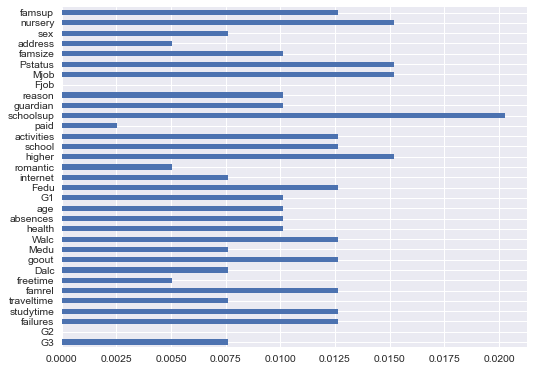

In [18]:
cal(df2)['porc_nulos'].plot(kind='barh')

En base a la inspección visual general de las variables se puede indicar que:

- Se corrigieron los problemas de forma de los datos
- Hay baja presencia de datos nulos
- Las variables se encuentran balanceadas.

### Inspección visual de vectores objetivo G1 - G2 - G3:

- La muestra esta tomada de 2 colegios: GP y MS con una distribucion de 345 (88,5%) para GP y 45 (11,5%) para MS
- Sin embargo los promedios finales (G3) tienen una mediana muy similar y con mayor concentracion en MS.
- Se observa una media cercana a 14 para las variables objetivo
- Se observa que la mayoria de las notas promedio estan bajo la media
- Se observan gran cantidad de valores ceros como promedio. (se evaluará su eliminación, no deberian existir promedios "cero")

GP    345
MS     45
Name: school, dtype: int64


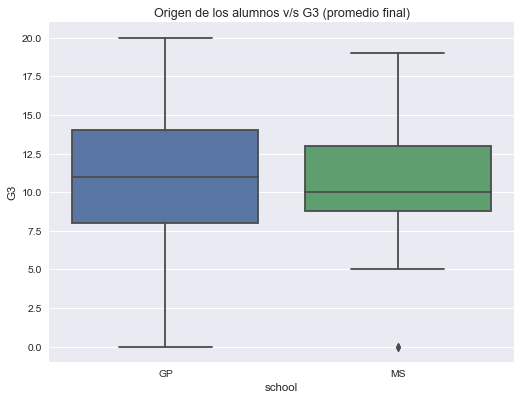

In [52]:
print(df2.school.value_counts())
sns.boxplot(x='school', y='G3', data=df2)
plt.title('Origen de los alumnos v/s G3 (promedio final)')
plt.show()

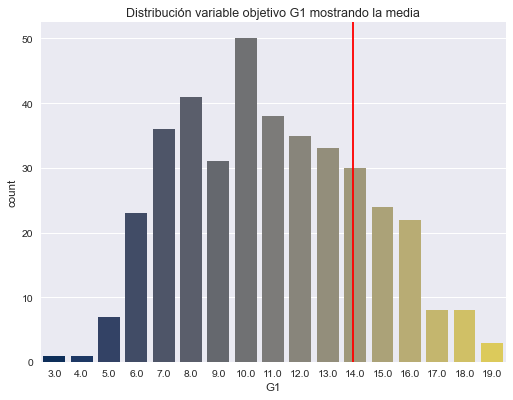

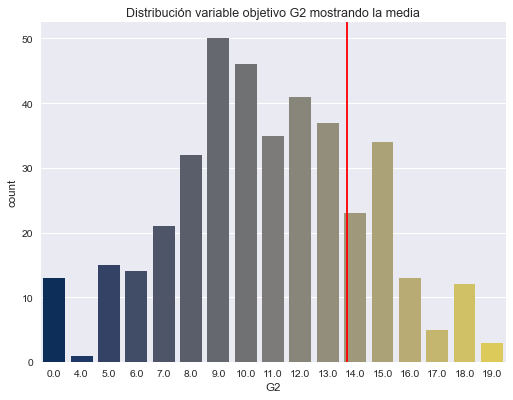

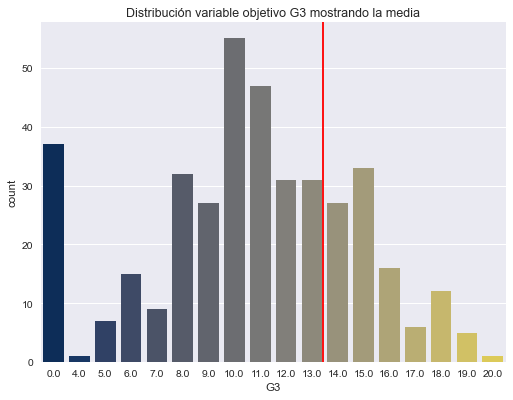

In [41]:
for i in ['G1', 'G2', 'G3']:
    sns.countplot(x=df2[i], palette="cividis")
    plt.axvline(df2[i].mean(),color='r')
    plt.title(f'Distribución variable objetivo {i} mostrando la media')
    plt.show()

### Inspección visual de relaciones entre vectores de interes en función del sexo del alumno:

- En el global, no hay grandes diferencias en el promedio de hombres y mujeres.
- En el detalle hay direfencias dependiendo de los tipos de trabajo de sus padres.
- Nuevamente se detecta que los promedios "cero" son outlier y se deberian eliminar


Text(0.5, 1.0, 'Promedio final (G3) según sexo del alumno ')

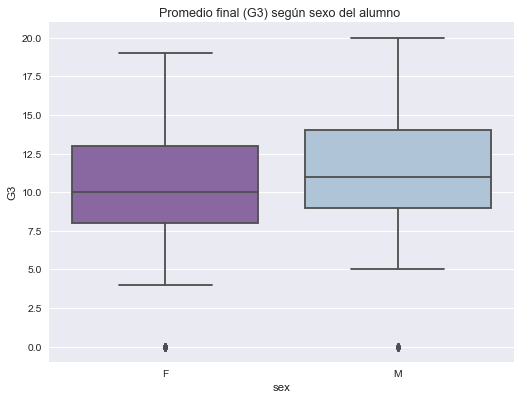

In [46]:
sns.boxplot(x='sex', y='G3', data=df2, palette='BuPu_r')
plt.title('Promedio final (G3) según sexo del alumno ')

Text(0.5, 1.0, 'Promedio final (G3) según ocupación del padre del alumno')

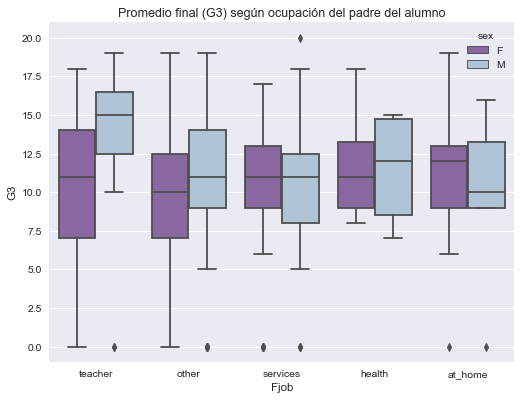

In [47]:
sns.boxplot(x='Fjob', y='G3', hue='sex', data=df2, palette='BuPu_r')
plt.title('Promedio final (G3) según ocupación del padre del alumno')
#plt.text(-0.5, 19.4, 'Se ve una diferencia en hombres,\nhijos de profesores', fontdict=font)

Text(0.5, 1.0, 'Promedio final (G3) según ocupación de la madre del alumno')

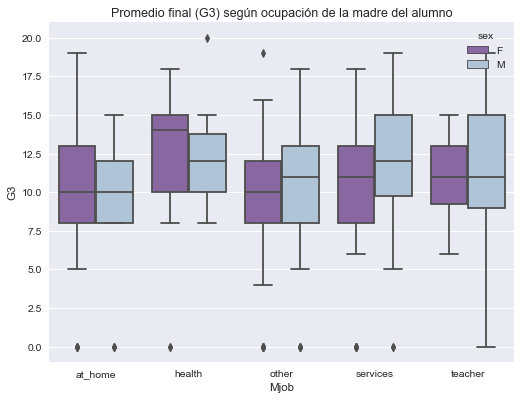

In [48]:
sns.boxplot(x='Mjob', y='G3', hue='sex', data=df2, palette='BuPu_r')
plt.title('Promedio final (G3) según ocupación de la madre del alumno')

### Inspección visual de otros vectores de interes:

- Hay una relación entre las horas de estudio y los mejores promedios G3.
- ///ver otras variables
- Nuevamente se detecta que los promedios "cero" son outlier y se deberian eliminar.

Text(0.5, 1.0, 'Promedio final (G3) v/s horas de estudio')

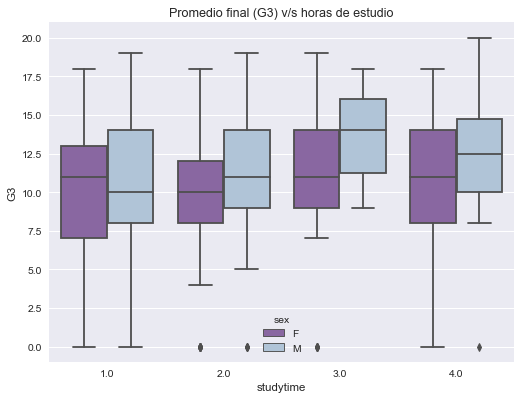

In [49]:
sns.boxplot(x='studytime', y='G3', hue='sex', data=df2, palette='BuPu_r')
plt.title('Promedio final (G3) v/s horas de estudio')

### Inspección visual de correlaciones:

- Hay una relación entre las horas de estudio y los mejores promedios G3.

<AxesSubplot:>

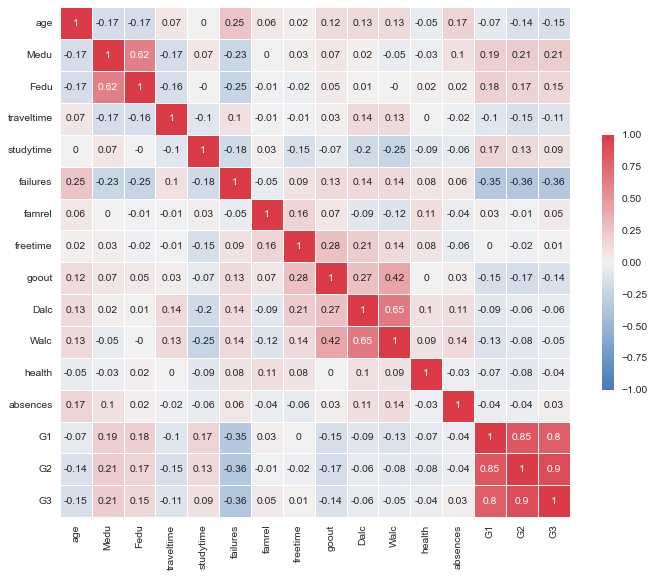

In [16]:
f, ax = plt.subplots(figsize=(11, 9)) # Tamaño
cmap = sns.diverging_palette(250, 10, as_cmap=True) #Colores Personalizados

sns.heatmap(round(df2.corr(),2),cmap=cmap, annot=True, vmin=-1, vmax=1,
           square=True, linewidths=.5, cbar_kws={"shrink": .5} )

#sns.heatmap(round(df2.corr(), 2), annot=True, cmap='coolwarm', vmin=-1, vmax=1)